In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds_emp=pd.read_csv("Employee_salary.csv")
ds_emp

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$81000.00,$73862.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$74628.00,$74628.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,$77280.00,$70174.00
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$96276.00,$96276.00
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,$84032.00,$76627.00
...,...,...,...,...,...
34213,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,$74628.00,$74628.00
34214,"ZYNIEWICZ, ROBERT J",CONSTRUCTION LABORER,WATER MGMNT,$73216.00,$66764.00
34215,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,$77238.00,$77238.00
34216,"ZYSKO, RICHARD",LIEUTENANT,FIRE,$101958.00,$101958.00


In [3]:
ds_emp.dtypes

NAME                                       object
JOB TITLE                                  object
DEPARTMENT                                 object
EMPLOYEE ANNUAL SALARY                     object
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    object
dtype: object

### Checking Null values

In [4]:
ds_emp.isnull().sum()  #no null values

NAME                                       0
JOB TITLE                                  0
DEPARTMENT                                 0
EMPLOYEE ANNUAL SALARY                     0
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    0
dtype: int64

### Finding Unique Values

In [5]:
ds_emp["DEPARTMENT"].unique()

array(['WATER MGMNT', 'POLICE', 'FLEET MANAGEMNT', 'FIRE',
       'FAMILY & SUPPORT', 'TRANSPORTN', 'STREETS & SAN', 'REVENUE',
       'BUSINESS AFFAIRS', 'COMMUNITY DEVELOPMENT', 'OEMC', 'HEALTH',
       'ENVIRONMENT', 'GENERAL SERVICES', 'AVIATION', 'LAW',
       'PUBLIC LIBRARY', 'ADMIN HEARNG', 'CULTURAL AFFAIRS', 'BUILDINGS',
       'FINANCE', 'CITY COUNCIL', 'ANIMAL CONTRL', 'CITY CLERK',
       'BOARD OF ELECTION', 'COMPLIANCE', 'HUMAN RESOURCES', 'TREASURER',
       'DISABILITIES', 'IPRA', "MAYOR'S OFFICE", 'DoIT', 'PROCUREMENT',
       'HUMAN RELATIONS', 'INSPECTOR GEN', 'BOARD OF ETHICS',
       'BUDGET & MGMT', 'POLICE BOARD', 'LICENSE APPL COMM'], dtype=object)

In [6]:
ds_emp_title=ds_emp["JOB TITLE"].unique()
ds_emp_title
pd.DataFrame(ds_emp_title)    #there are 1123 unique values so we will drop this column as we cant label encode

,0
0,WATER RATE TAKER
1,POLICE OFFICER
2,CHIEF CONTRACT EXPEDITER
3,CIVIL ENGINEER IV
4,ELECTRICAL MECHANIC
...,...
1119,DECK HAND
1120,ASST CHIEF HIGHWAY ENGINEER
1121,CASE ANALYST - LAW
1122,OPERATIONS ANALYST


In [7]:
for i in ds_emp.columns:
    print(i)
    print(ds_emp[i].value_counts())
    print('\n')

NAME
PEREZ,  JOSE A         4
KELLY,  MICHAEL J      4
HERNANDEZ,  JUAN C     4
RODRIGUEZ,  RICHARD    4
BROWN,  DAVID L        3
                      ..
OLIJNYK,  BOHDAN       1
COLLINS,  ELEANOR D    1
HOSTY,  JOSEPH W       1
PRICE,  TORREY C       1
SNELLING,  LARRY B     1
Name: NAME, Length: 33908, dtype: int64


JOB TITLE
POLICE OFFICER                            10918
FIREFIGHTER                                1242
FIREFIGHTER-EMT                            1198
SERGEANT                                   1177
MOTOR TRUCK DRIVER                          931
                                          ...  
CUSTOMER SERVICES SUPVSR                      1
CITY ARCHITECT                                1
COMMISSIONER OF GENERAL SERVICES              1
COMMISSIONER OF HOUSING & ECONOMIC DEV        1
SUPVSR OF COMPENSATION                        1
Name: JOB TITLE, Length: 1124, dtype: int64


DEPARTMENT
POLICE                   14147
FIRE                      5085
STREETS & SAN        

### Dropping Columns

In [8]:
cols=["NAME","JOB TITLE"]
ds_emp=ds_emp.drop(cols,axis=1)
ds_emp

,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,WATER MGMNT,$81000.00,$73862.00
1,POLICE,$74628.00,$74628.00
2,FLEET MANAGEMNT,$77280.00,$70174.00
3,WATER MGMNT,$96276.00,$96276.00
4,WATER MGMNT,$84032.00,$76627.00
...,...,...,...
34213,POLICE,$74628.00,$74628.00
34214,WATER MGMNT,$73216.00,$66764.00
34215,POLICE,$77238.00,$77238.00
34216,FIRE,$101958.00,$101958.00


### Changing Data Types

In [9]:
ds_emp['EMPLOYEE ANNUAL SALARY'] = ds_emp['EMPLOYEE ANNUAL SALARY'].str.replace('$', '')
pd.DataFrame(ds_emp['EMPLOYEE ANNUAL SALARY'])

,EMPLOYEE ANNUAL SALARY
0,81000.00
1,74628.00
2,77280.00
3,96276.00
4,84032.00
...,...
34213,74628.00
34214,73216.00
34215,77238.00
34216,101958.00


In [10]:
ds_emp['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'] = ds_emp['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'].str.replace('$', '')
pd.DataFrame(ds_emp['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'])

,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,73862.00
1,74628.00
2,70174.00
3,96276.00
4,76627.00
...,...
34213,74628.00
34214,66764.00
34215,77238.00
34216,101958.00


In [11]:
ds_emp[["EMPLOYEE ANNUAL SALARY", "ESTIMATED ANNUAL SALARY MINUS FURLOUGHS"]] = ds_emp[["EMPLOYEE ANNUAL SALARY", "ESTIMATED ANNUAL SALARY MINUS FURLOUGHS"]].apply(pd.to_numeric)

In [12]:
ds_emp.dtypes

DEPARTMENT                                  object
EMPLOYEE ANNUAL SALARY                     float64
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    float64
dtype: object

In [13]:
ds_emp

,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,WATER MGMNT,81000.0,73862.0
1,POLICE,74628.0,74628.0
2,FLEET MANAGEMNT,77280.0,70174.0
3,WATER MGMNT,96276.0,96276.0
4,WATER MGMNT,84032.0,76627.0
...,...,...,...
34213,POLICE,74628.0,74628.0
34214,WATER MGMNT,73216.0,66764.0
34215,POLICE,77238.0,77238.0
34216,FIRE,101958.0,101958.0


### Quatifying with Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds_emp["DEPARTMENT"]=le.fit_transform(ds_emp["DEPARTMENT"].astype(str))
ds_emp

,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,38,81000.0,73862.0
1,30,74628.0,74628.0
2,19,77280.0,70174.0
3,38,96276.0,96276.0
4,38,84032.0,76627.0
...,...,...,...
34213,30,74628.0,74628.0
34214,38,73216.0,66764.0
34215,30,77238.0,77238.0
34216,18,101958.0,101958.0


In [15]:
ds_emp.dtypes

DEPARTMENT                                   int32
EMPLOYEE ANNUAL SALARY                     float64
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    float64
dtype: object

### Checking Skewness

In [16]:
ds_emp.skew()

DEPARTMENT                                -1.065106
EMPLOYEE ANNUAL SALARY                    -0.571787
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS   -0.686903
dtype: float64

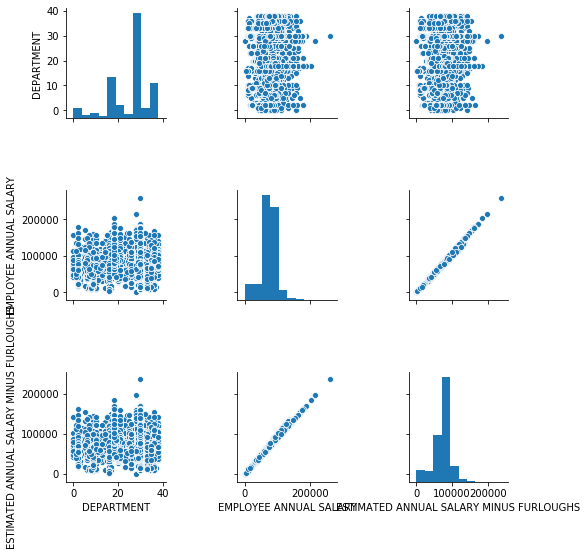

In [17]:
sns.pairplot(ds_emp)

### Bivariate Analysis

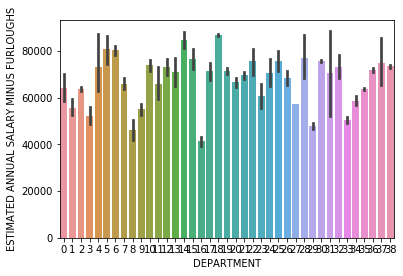

In [18]:
sns.barplot(x=ds_emp["DEPARTMENT"],y=ds_emp["ESTIMATED ANNUAL SALARY MINUS FURLOUGHS"],data=ds_emp)
plt.show()

### Plotting Correlation

In [19]:
ds_emp.corr()

,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
DEPARTMENT,1.000000,-0.020931,-0.012801
EMPLOYEE ANNUAL SALARY,-0.020931,1.000000,0.990208
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS,-0.012801,0.990208,1.000000


### Seperating Input and Target Variable

In [20]:
x=ds_emp.iloc[:,0:-1]
x

,DEPARTMENT,EMPLOYEE ANNUAL SALARY
0,38,81000.0
1,30,74628.0
2,19,77280.0
3,38,96276.0
4,38,84032.0
...,...,...
34213,30,74628.0
34214,38,73216.0
34215,30,77238.0
34216,18,101958.0


In [21]:
y=ds_emp.iloc[:,-1]
y

0         73862.0
1         74628.0
2         70174.0
3         96276.0
4         76627.0
           ...   
34213     74628.0
34214     66764.0
34215     77238.0
34216    101958.0
34217    100205.0
Name: ESTIMATED ANNUAL SALARY MINUS FURLOUGHS, Length: 34218, dtype: float64

### Generating Best Random State

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [23]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    re=LinearRegression()
    re.fit(x_train,y_train)
    y_pred=re.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random_state:",r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr    
        final_r_state=r_state
print()
print()
print("max r2_score corresponding to",final_r_state,"is",max_r_score)

r2_score corresponding to random_state: 42 is: 0.9819728937561121
r2_score corresponding to random_state: 43 is: 0.980408653227365
r2_score corresponding to random_state: 44 is: 0.9799889924990186
r2_score corresponding to random_state: 45 is: 0.9808612728680636
r2_score corresponding to random_state: 46 is: 0.9806187647316682
r2_score corresponding to random_state: 47 is: 0.9799771231024285
r2_score corresponding to random_state: 48 is: 0.9810334563393368
r2_score corresponding to random_state: 49 is: 0.9809589996135119
r2_score corresponding to random_state: 50 is: 0.9809836488550319
r2_score corresponding to random_state: 51 is: 0.9801767279908894
r2_score corresponding to random_state: 52 is: 0.9807448789521187
r2_score corresponding to random_state: 53 is: 0.9803949872496083
r2_score corresponding to random_state: 54 is: 0.9807457495516438
r2_score corresponding to random_state: 55 is: 0.9806581783159426
r2_score corresponding to random_state: 56 is: 0.9800359587900606
r2_score co

### Cross Validation Score

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cross_val_score(LinearRegression(),x,y,cv=5,scoring="r2").mean()

0.9805379480161921

### Re_Testing using best Random_State

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)
re=LinearRegression()
re.fit(x_train,y_train)
y_pred=re.predict(x_test)
print(y_pred)
print("r2 score is :",(r2_score(y_test,y_pred)))
print("Root_Mean_Squared_Error is :",np.sqrt(mean_squared_error(y_test,y_pred)))

[59677.40190743 80710.13838172 77954.5377071  ... 65980.66082656
 87219.58486537 75369.89224048]
r2 score is : 0.9819728937561121
Root_Mean_Squared_Error is : 3049.5626470383227


### Saving the Model

In [27]:
import joblib
joblib.dump(re,"re_Emp_Salary_Model.obj")

['re_Emp_Salary_Model.obj']

### Loading Model

In [29]:
Emp_Salary_re=joblib.load("re_Emp_Salary_Model.obj")

### Using Model 

In [30]:
Emp_Salary_re.predict(x_test)

array([59677.40190743, 80710.13838172, 77954.5377071 , ...,
       65980.66082656, 87219.58486537, 75369.89224048])